In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
cars = pd.read_csv('./Data/usedCleaned20.csv')

In [3]:
cars

,Brend,Cena,Godiste,Gorivo,Karoserija,Kilometraza,Kubikaza,Model,Snaga
0,ALFA ROMEO,2150,2007,Dizel,Hecbek,215000,1.9,147,120
1,ALFA ROMEO,2850,2006,Dizel,Hecbek,222000,1.9,147,150
2,ALFA ROMEO,1850,2004,Dizel,Limuzina,178000,1.9,147,116
3,ALFA ROMEO,1700,2004,Dizel,Hecbek,156906,1.9,147,116
4,ALFA ROMEO,1700,2002,Dizel,Hecbek,272000,1.9,147,116
...,...,...,...,...,...,...,...,...,...
23507,SKODA,13490,2015,Dizel,Karavan,129000,2.0,SUPERB,150
23508,SKODA,19900,2017,Dizel,Limuzina,108000,2.0,SUPERB,190
23509,SKODA,15000,2015,Dizel,Limuzina,129000,2.0,SUPERB,190
23510,SKODA,9000,2012,Dizel,Limuzina,180000,2.0,SUPERB,170


<AxesSubplot:xlabel='Godiste', ylabel='Cena'>

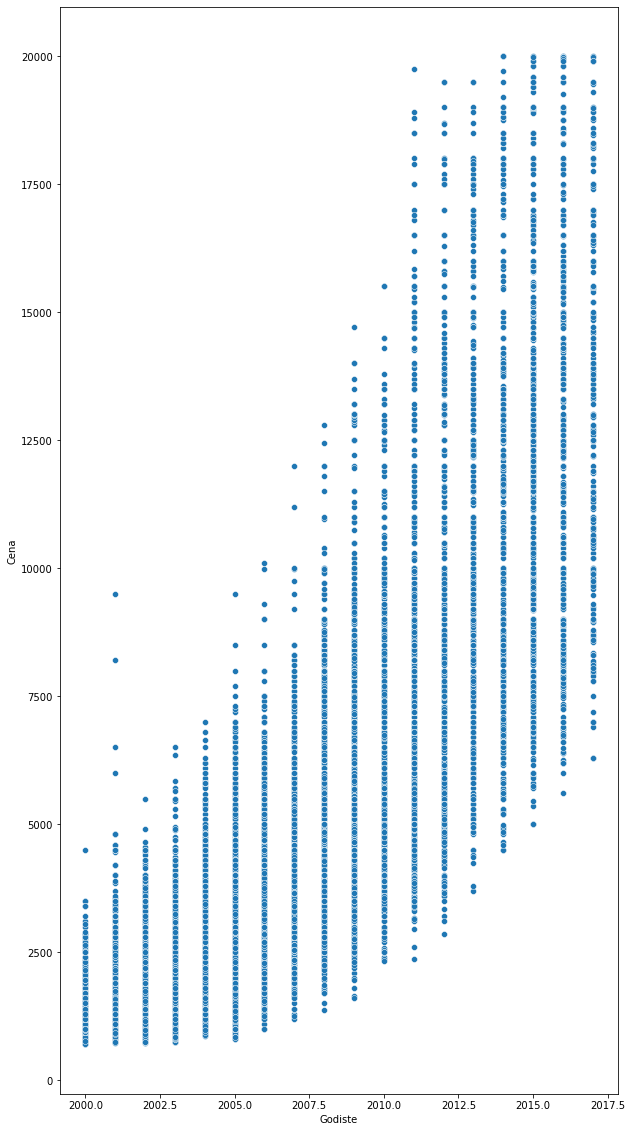

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,20))
sns.scatterplot(x='Godiste',y='Cena',data=cars)

In [7]:
for i in range(5):
    for year in range(2000,2021):
        max = cars[cars['Godiste']==year]['Cena'].max()
        min = cars[cars['Godiste']==year]['Cena'].min()
        cars.drop(cars[(cars['Godiste']==year) & (cars['Cena']==max)].index, inplace=True)
        cars.drop(cars[(cars['Godiste']==year) & (cars['Cena']==min)].index, inplace=True)

<AxesSubplot:xlabel='Godiste', ylabel='Cena'>

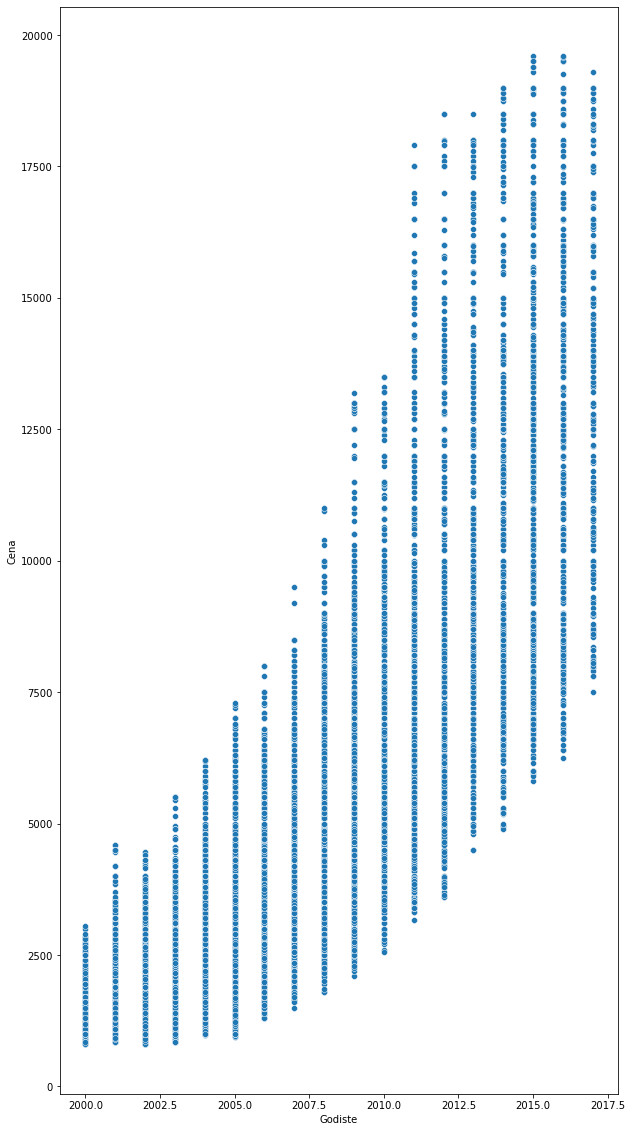

In [8]:
plt.figure(figsize=(10,20))
sns.scatterplot(x='Godiste',y='Cena',data=cars)

In [9]:
cars['Karoserija'].unique()

array(['Hecbek ', 'Limuzina ', 'Karavan ', 'Dzip/SUV ',
       'Monovolumen (MiniVan) '], dtype=object)

In [28]:
import random

def recommend_car(car):
    
    mileage = car['Kilometraza']
    year = car['Godiste']
    volume = car['Kubikaza']
    power = car['Snaga']
    car_type =  car['Karoserija']
    price = car['Cena']
    
    if car_type=='Limuzina ' or car_type=='Karavan ':
        car_type=['Limuzina ', 'Karavan ']
    elif car_type=='Dzip/SUV ':
        car_type=['Dzip/SUV ', 'Karavan ']
    elif car_type=='Monovolumen (MiniVan) ':
        car_type=['Monovolumen (MiniVan) ']
    else:
        car_type = ['Hecbek ']
    
    mileage_high = mileage + 20000
    mileage_low = mileage - 20000
    
    year_high = year + 1
    year_low = year - 1
    
    volume_high = volume + volume*0.25
    volume_low = volume -  volume*0.25
    
    power_high = power + power*0.25
    power_low =  power - power*0.25
    
    price_high = price + price*0.1
    price_low = price - price*0.1
    
    try:
        df = cars[
                  (cars['Godiste']<=year_high) & (cars['Godiste']>=year_low) 
                  & (cars['Karoserija'].isin(car_type)) 
                  & (cars['Kilometraza']<=mileage_high) & (cars['Kilometraza']>=mileage_low)
                  & (cars['Kubikaza']>=volume_low) & (cars['Kubikaza']<=volume_high) 
                  & (cars['Snaga']>=power_low) & (cars['Snaga']<=power_high)
                  & (cars['Cena']>=price_low) & (cars['Cena']<=price_high)]
        #(cars['Cena']>=price_low) & (cars['Cena']<=price_high)
        
        random_similar = df.sample(n=5, random_state=1).values.tolist()
        
        print(random_similar)
        return random_similar
    except Exception as e:
        print(e)
    
user_cars = recommend_car(dict(cars.iloc[1892]))

[['VOLKSWAGEN', 11950, 2015, 'Dizel ', 'Karavan ', 180000, 2.0, 'PASSAT B8', 150], ['SKODA', 13999, 2015, 'Dizel ', 'Limuzina ', 200000, 2.0, 'SUPERB', 190], ['PEUGEOT', 12999, 2015, 'Dizel ', 'Karavan ', 161000, 2.0, '508', 179], ['VOLKSWAGEN', 12950, 2015, 'Dizel ', 'Karavan ', 184000, 2.0, 'PASSAT B8', 150], ['VOLKSWAGEN', 12700, 2015, 'Dizel ', 'Karavan ', 197000, 2.0, 'PASSAT B8', 150]]


In [16]:
dict(cars.iloc[1892])

{'Brend': 'AUDI',
 'Cena': 13000,
 'Godiste': 2014,
 'Gorivo': 'Dizel ',
 'Karoserija': 'Karavan ',
 'Kilometraza': 180000,
 'Kubikaza': 2.0,
 'Model': 'A4',
 'Snaga': 177}

In [30]:
import plotly.express as px
df = pd.read_csv('./Data/usedCleaned20.csv')

In [39]:
df_a = df[df['Model']=='A3']
fig = px.line(data_frame=df_a.groupby(['Godiste'])['Cena'].mean().reset_index(), x="Godiste", y="Cena", title='Prosečna cena po godištu')

In [40]:
fig.show()